# Sklearn
Материал взят из репозитория https://github.com/emeli-dral/sklearn_intro

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [3]:
data, target, coef = datasets.make_regression(n_features=2,
                                              n_informative=1,
                                              n_targets=1, 
                                              noise=5.,
                                              coef=True,
                                              random_state=2)

In [4]:
print('Ground truth coefficients', coef)

Ground truth coefficients [38.07925837  0.        ]


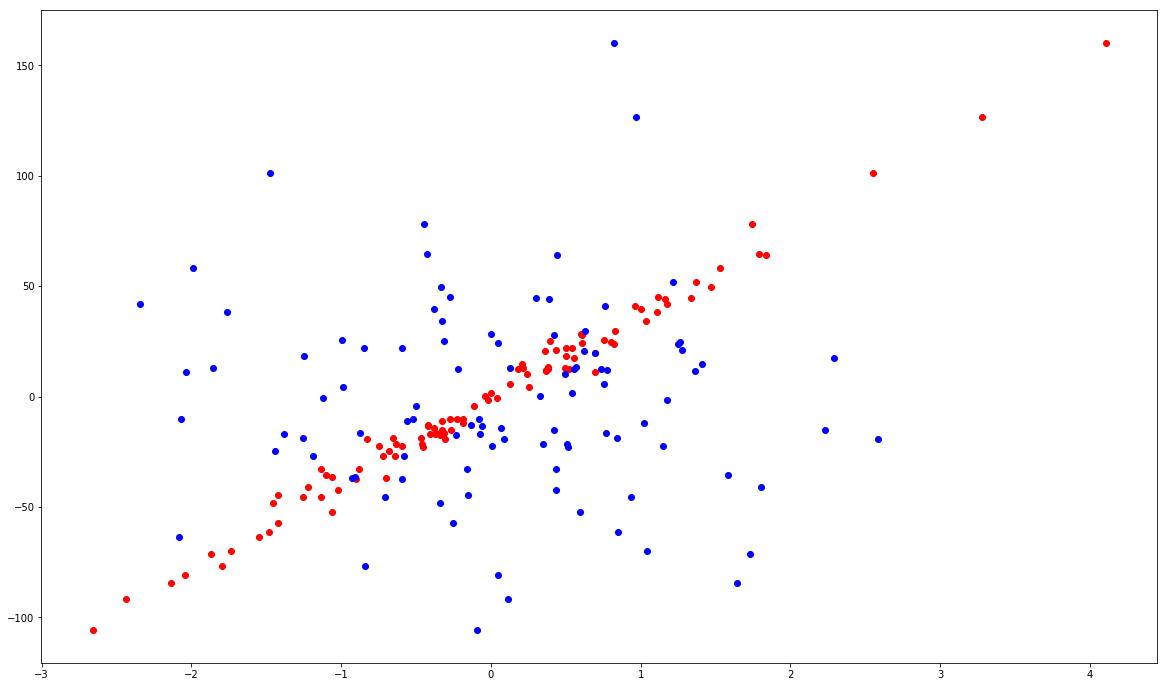

In [5]:
plt.figure(figsize=(20, 12))
pylab.scatter(list(map(lambda x: x[0], data)), target, color='r')
pylab.scatter(list(map(lambda x: x[1], data)), target, color='b')

In [6]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data,
                                                                                    target,  
                                                                                    test_size=0.3)

#### LinearRegression

In [7]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

/Users/stleznev/py_envs/dmia2018env/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [8]:
?linear_model.SGDRegressor

In [9]:
print(test_labels)

[  21.20540389  160.09441244   51.87072011   10.33267887   25.24428409
  -36.69728864   12.74038341   20.87713077  -84.32102748 -105.77758163
  -22.33224966  -40.84204295  -61.47026695  -19.16792315  -13.26392817
  -63.4056294   -71.3715844   -44.51417742   44.41658249   78.24817537
  -80.80239408   18.17188553   12.42286854   49.41686419   11.96165156
  -12.0017312    24.82763821  -17.27897399   34.35183007   11.06961035]


In [10]:
print(predictions)

[  15.80743121  154.59078946   51.06943897    8.52603449   14.35372497
  -27.02696892    7.48498762   12.97541357  -81.22819523 -101.05193833
  -28.85444438  -46.67462812  -56.56752017  -12.0016253   -16.35176358
  -59.09772865  -71.0994887   -54.2903058    43.27042727   65.15610017
  -77.66467042   18.33719001    6.22314646   54.80699347   13.20445581
   -7.49453872   29.61750539  -13.41485269   38.39200624   25.56905764]


In [11]:
metrics.mean_absolute_error(test_labels, predictions)

5.299616397518745

In [12]:
linear_scoring = model_selection.cross_val_score(linear_regressor,
                                                 data,
                                                 target,
                                                 scoring='neg_mean_absolute_error', 
                                                 cv=10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779699, std: 1.073710449289018


In [13]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=True)

In [14]:
linear_scoring = model_selection.cross_val_score(linear_regressor,
                                                 data,
                                                 target,
                                                 scoring=scorer, 
                                                 cv=10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779699, std: 1.073710449289018


In [15]:
coef

array([38.07925837,  0.        ])

In [16]:
print('Intercept', linear_regressor.intercept_)
print('Coefficients', linear_regressor.coef_)

Intercept -0.6102011795270781
Coefficients [3.77666328e+01 3.59327470e-02]


In [17]:
print("y = 0.0 + {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 0.0 + 38.08*x1 + 0.00*x2


In [18]:
print("y = {:.2f} + {:.2f}*x1 + {:.2f}*x2".format(linear_regressor.intercept_,
                                                 linear_regressor.coef_[0],
                                                 linear_regressor.coef_[1]))

y = -0.61 + 37.77*x1 + 0.04*x2


#### Lasso

In [19]:
lasso_regressor = linear_model.Lasso(random_state=3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [20]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor,
                                                data,
                                                target,
                                                scoring=scorer,
                                                cv=10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666395, std: 1.0170354384993354


In [21]:
print('Intercept', lasso_regressor.intercept_)
print('Coefficients', lasso_regressor.coef_)

Intercept -0.632850724563898
Coefficients [36.77679939 -0.        ]


In [22]:
print("y = 0.0 + {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 0.0 + 38.08*x1 + 0.00*x2


In [23]:
print("y = {:.2f} + {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.intercept_,
                                                  lasso_regressor.coef_[0],
                                                  lasso_regressor.coef_[1]))

y = -0.63 + 36.78*x1 + -0.00*x2


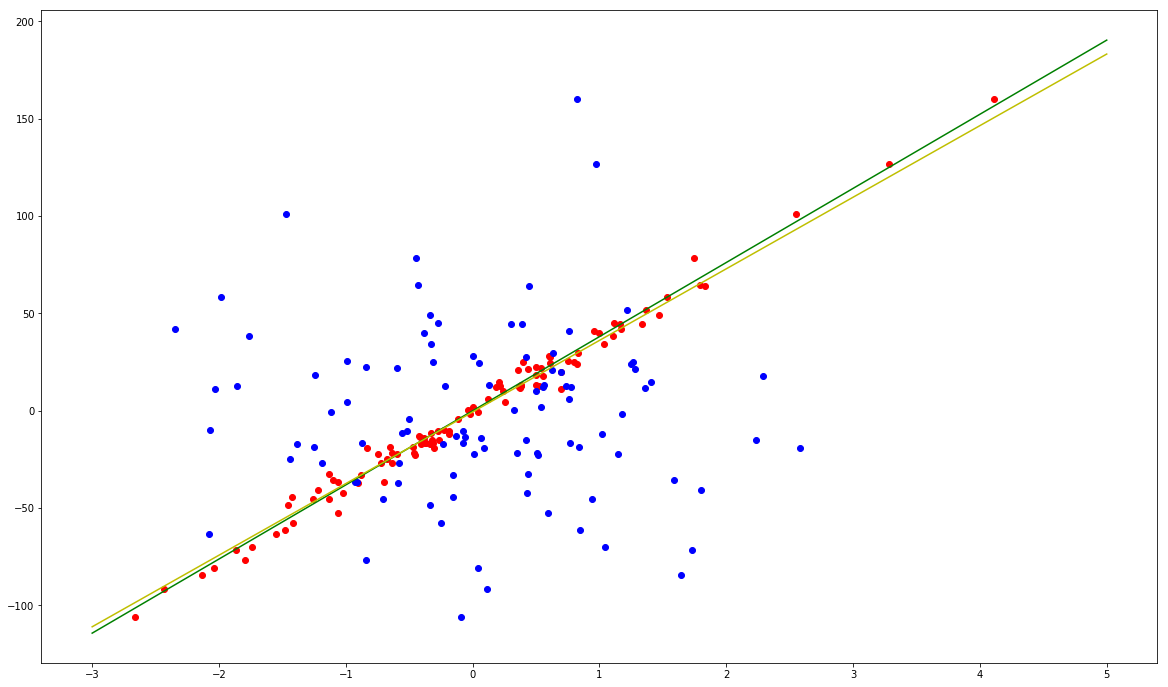

In [24]:
plt.figure(figsize=(20, 12))
pylab.scatter(list(map(lambda x: x[0], data)), target, color='r')
pylab.scatter(list(map(lambda x: x[1], data)), target, color='b')

x_points = np.linspace(-3, 5)
y_points_gt = x_points * coef[0]
y_points_lasso = (x_points * lasso_regressor.coef_[0]
                  + lasso_regressor.intercept_)
plt.plot(x_points, y_points_gt, c='g')
plt.plot(x_points, y_points_lasso, c='y')